## Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
import math

In [2]:
df1 = pd.read_csv('laptops.csv')

# Data Cleaning

### Before Data Cleaning

In [3]:
df1.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


### After Data Cleaning

In [4]:
replacement_mapping = {
    '512GB SSD': 'SSD',
    '128GB PCIe SSD': 'SSD',
    '1TB HDD': 'HDD',
    '512GB NVMe SSD': 'SSD',
    '1TB NVMe SSD': 'SSD',
    '256GB PCIe SSD': 'SSD',
    '128GB SSD': 'SSD',
    '1TB Fusion Drive': 'Fusion Drive',
    '4TB HDD': 'HDD',
    '2TB NVMe SSD': 'SSD',
    '256GB Flash Storage': 'Flash Storage',
    '6TB HDD': 'HDD',
    '512GB eMMC': 'eMMC',
    '256GB eMMC': 'eMMC',
    '2TB SATA SSD': 'SATA SSD',
    '1TB SSHD': 'SSHD',
    '256GB SSD': 'SSD',
    '2TB HDD': 'HDD'
}

# Replace values in the 'Storage' column using the mapping
df1['Memory'] = df1['Memory'].replace(replacement_mapping)

In [5]:
df1['ScreenResolution'] = df1['ScreenResolution'].replace('IPS Panel Retina Display 2560x1600', '4K')

condition = df1['ScreenResolution'] == '4K'

# Use df.where and dropna to filter rows
filtered_df = df1.where(condition).dropna()

In [6]:
df1['R_inches'] = df1['Inches'].round().astype(int)

In [7]:
df1['R_weight'] = df1['Weight'].round(2)

In [8]:
df1['ScreenResolution'] = df1['ScreenResolution'].replace(['HD 1920x1080 ','IPS Panel Full HD / Touchscreen 1920x1080'],'Full HD')

condition = df1['ScreenResolution'] == 'Full HD'

# Use df.where and dropna to filter rows
filtered_df = df1.where(condition).dropna()

In [9]:
inr_to_myr = 0.057

df1['MYR_price'] = df1['Price'] * inr_to_myr
df1['MYR_price'] = df1['MYR_price'].round(2)

filtered_df = df1.drop(['Price', 'Inches', 'Weight'], axis=1)

In [10]:
df = filtered_df
df.head()

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,R_inches,R_weight,MYR_price
0,MSI,Business Laptop,4K,Intel Core i7,12GB,SSD,Intel Iris Xe Graphics,Linux,17,2.06,2043.11
1,Chuwi,2 in 1 Convertible,Full HD,Intel Core i5,12GB,SSD,Intel Iris Xe Graphics,No OS,17,4.06,2110.09
2,hp,WorkStation,Full HD,Intel Xeon E3-1505M,8GB,HDD,Intel Iris Xe Graphics,Linux,17,2.90,1899.77
3,MSI,2 in 1 Convertible,2K,Intel Core i7,16GB,SSD,Intel Iris Xe Graphics,Windows 10,12,2.91,3911.97
4,Microsoft,Gaming,Full HD,Intel Core i5,8GB,SSD,AMD Radeon RX 5600M,Windows 10,13,4.34,1929.02


In [11]:
df = pd.DataFrame(df)

In [12]:
df.to_csv('new_laptop.csv', index = False)

In [13]:
df = pd.read_csv('new_laptop.csv')
df.head()

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,R_inches,R_weight,MYR_price
0,MSI,Business Laptop,4K,Intel Core i7,12GB,SSD,Intel Iris Xe Graphics,Linux,17,2.06,2043.11
1,Chuwi,2 in 1 Convertible,Full HD,Intel Core i5,12GB,SSD,Intel Iris Xe Graphics,No OS,17,4.06,2110.09
2,hp,WorkStation,Full HD,Intel Xeon E3-1505M,8GB,HDD,Intel Iris Xe Graphics,Linux,17,2.90,1899.77
3,MSI,2 in 1 Convertible,2K,Intel Core i7,16GB,SSD,Intel Iris Xe Graphics,Windows 10,12,2.91,3911.97
4,Microsoft,Gaming,Full HD,Intel Core i5,8GB,SSD,AMD Radeon RX 5600M,Windows 10,13,4.34,1929.02


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   ScreenResolution  1000 non-null   object 
 3   Cpu               1000 non-null   object 
 4   Ram               1000 non-null   object 
 5   Memory            1000 non-null   object 
 6   Gpu               1000 non-null   object 
 7   OpSys             1000 non-null   object 
 8   R_inches          1000 non-null   int64  
 9   R_weight          1000 non-null   float64
 10  MYR_price         1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [15]:
df.isna().sum()

CompanyName         0
TypeOfLaptop        0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
R_inches            0
R_weight            0
MYR_price           0
dtype: int64

## Exploratory Data Analysis (EDA)

In [16]:
df.describe()

,R_inches,R_weight,MYR_price
count,1000.000000,1000.000000,1000.000000
mean,14.499000,3.469810,2941.328620
std,2.113401,0.857131,786.761588
min,11.000000,2.000000,1713.440000
25%,13.000000,2.720000,2301.467500
50%,15.000000,3.480000,2888.990000
75%,16.000000,4.190000,3528.147500
max,18.000000,4.990000,6562.830000


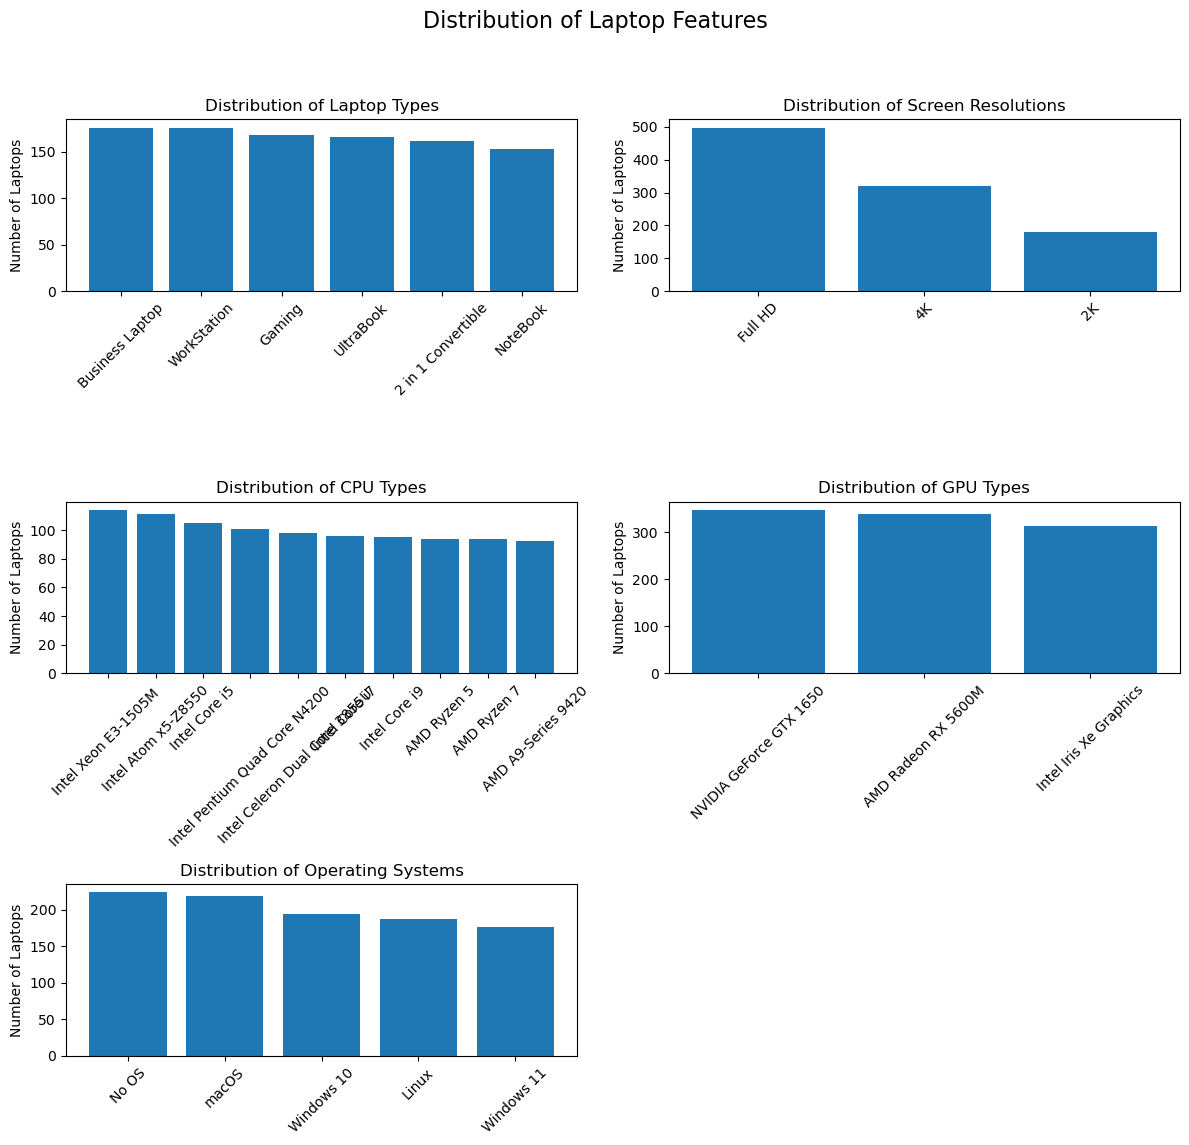

In [17]:
# Type of Laptop
count_type = df['TypeOfLaptop'].value_counts().reset_index()
count_type.columns = ['TypeOfLaptop', 'Count']

# Screen Resolution
resolution = df['ScreenResolution'].value_counts().reset_index()
resolution.columns = ['ScreenResolution', 'Count']

# CPU
cpu = df['Cpu'].value_counts().reset_index()
cpu.columns = ['Cpu', 'Count']

# GPU
gpu = df['Gpu'].value_counts().reset_index()
gpu.columns = ['Gpu', 'Count']

# Operating System
os = df['OpSys'].value_counts().reset_index()
os.columns = ['OpSys', 'Count']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Laptop Features', fontsize=16)

# Plot 1
axes[0, 0].bar(count_type['TypeOfLaptop'], count_type['Count'])
axes[0, 0].set_title('Distribution of Laptop Types')
axes[0, 0].set_ylabel('Number of Laptops')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2
axes[0, 1].bar(resolution['ScreenResolution'], resolution['Count'])
axes[0, 1].set_title('Distribution of Screen Resolutions')
axes[0, 1].set_ylabel('Number of Laptops')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3
axes[1, 0].bar(cpu['Cpu'], cpu['Count'])
axes[1, 0].set_title('Distribution of CPU Types')
axes[1, 0].set_ylabel('Number of Laptops')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4
axes[1, 1].bar(gpu['Gpu'], gpu['Count'])
axes[1, 1].set_title('Distribution of GPU Types')
axes[1, 1].set_ylabel('Number of Laptops')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5
axes[2, 0].bar(os['OpSys'], os['Count'])
axes[2, 0].set_title('Distribution of Operating Systems')
axes[2, 0].set_ylabel('Number of Laptops')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot in the last row and column
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Visualization

C:\Users\Teoh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


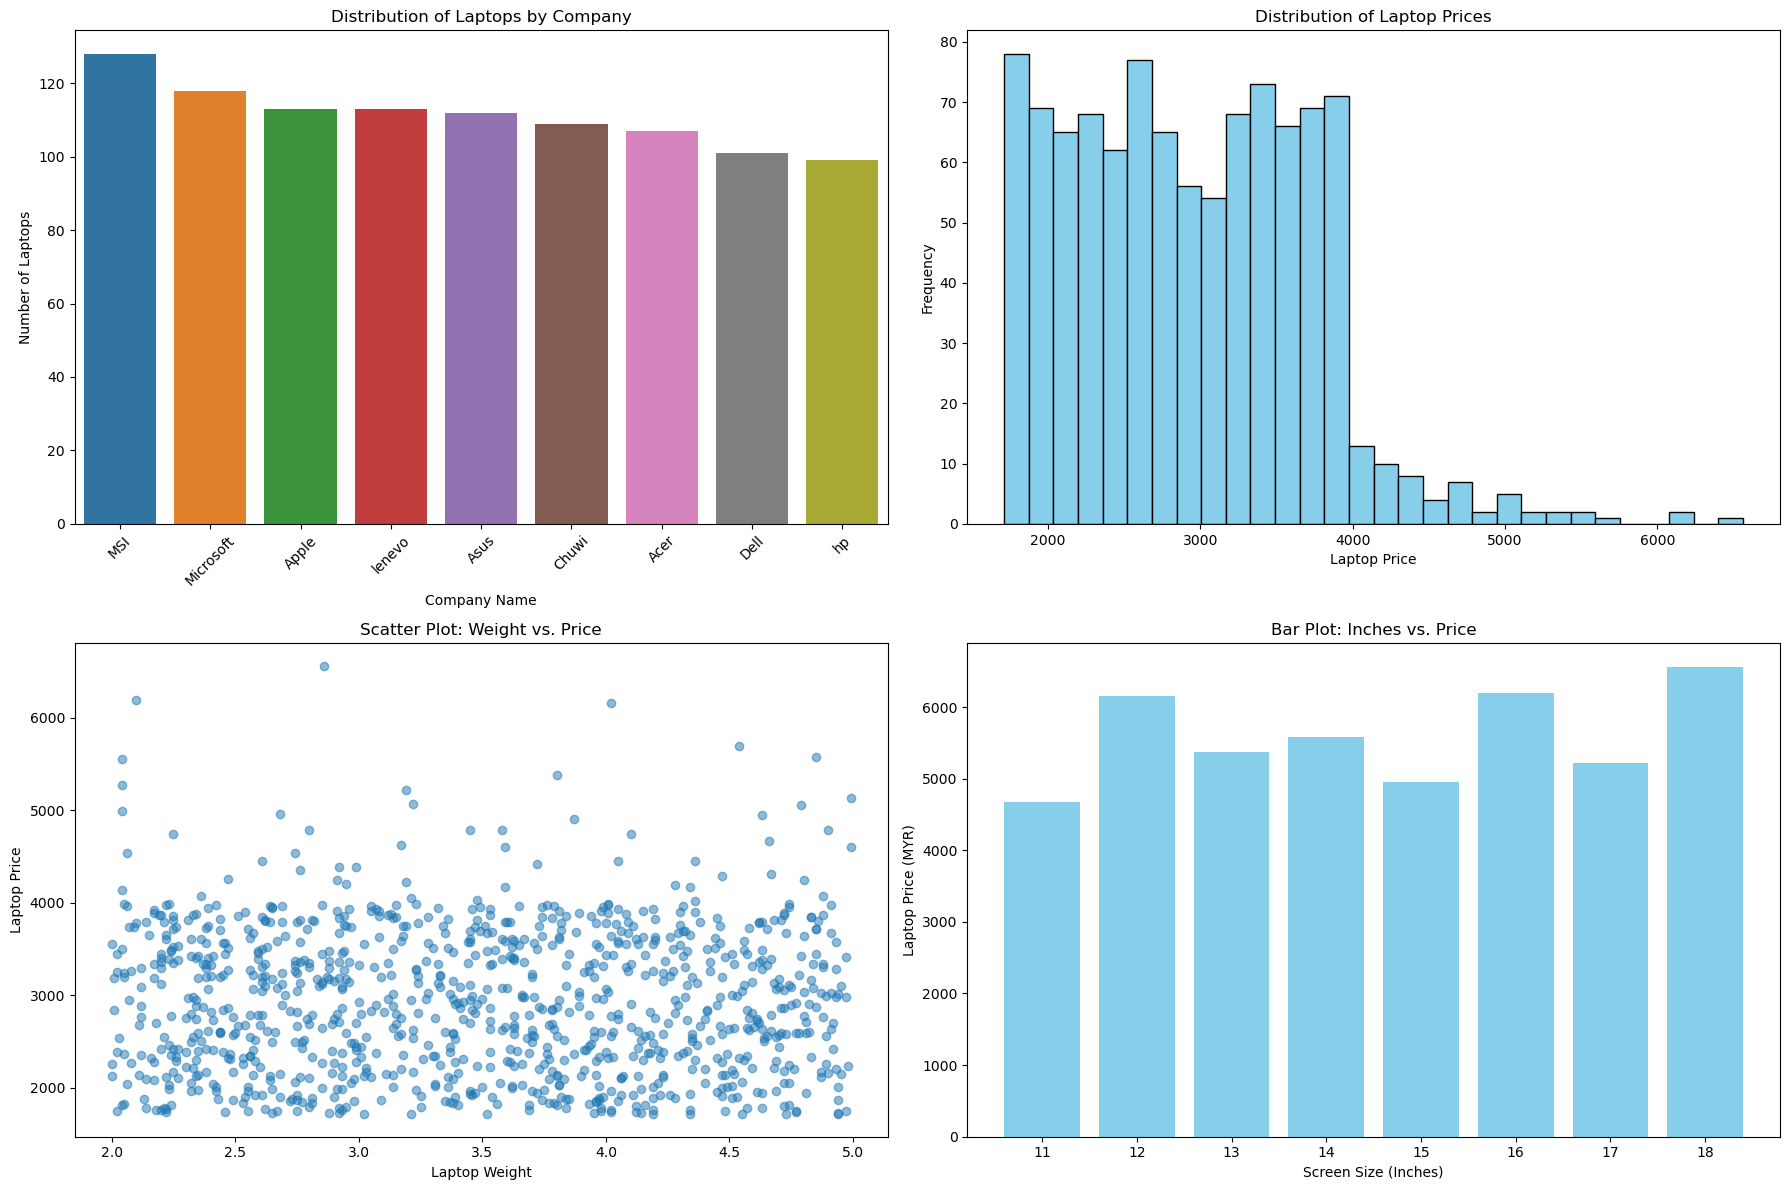

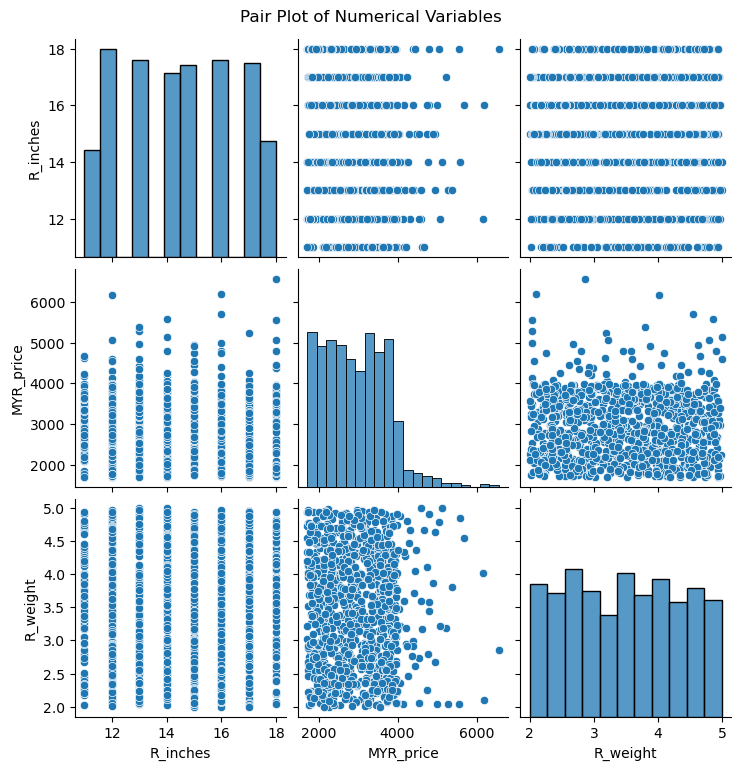

In [18]:
# Company Distribution
company_distribution = df['CompanyName'].value_counts().reset_index()
company_distribution.columns = ['CompanyName', 'Count']

plt.figure(figsize=(18, 12))

# Subplot 1: Company Distribution
plt.subplot(2, 2, 1)
sns.barplot(x='CompanyName', y='Count', data=company_distribution)
plt.title('Distribution of Laptops by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)

# Subplot 2: Price Distribution
plt.subplot(2, 2, 2)
plt.hist(df['MYR_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')

# Subplot 3: Scatter Plot - Price vs. Weight
plt.subplot(2, 2, 3)
plt.scatter(df['R_weight'], df['MYR_price'], alpha=0.5)
plt.title('Scatter Plot: Weight vs. Price')
plt.xlabel('Laptop Weight')
plt.ylabel('Laptop Price')

# Subplot 4: Bar Plot - Inches vs. Price
plt.subplot(2, 2, 4)
plt.bar(df['R_inches'], df['MYR_price'], color='skyblue')
plt.title('Bar Plot: Inches vs. Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Laptop Price (MYR)')

# Adjust layout
plt.tight_layout()

# Show the pair plot
pairplot_vars = ['R_inches', 'MYR_price', 'R_weight']
sns.pairplot(df[pairplot_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)

plt.show()

In [19]:
df.columns

Index(['CompanyName', 'TypeOfLaptop', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'R_inches', 'R_weight', 'MYR_price'],
      dtype='object')

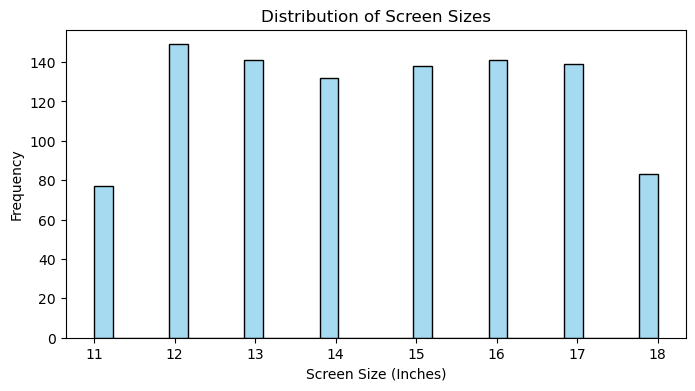

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df['R_inches'], bins=30, color='skyblue')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.show()

In [21]:
df_encoded = df.copy()

# List of categorical columns to encode
categorical_columns = ['TypeOfLaptop', 'Cpu', 'OpSys','CompanyName',
                       'ScreenResolution','Gpu','Ram','Memory']

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
df_encoded[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [22]:
# Assuming 'df_encoded' includes numerical features you want to normalize
numerical_features = ['R_inches', 'Ram', 'R_weight']

In [23]:
df_encoded.head()

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,R_inches,R_weight,MYR_price
0,5,1,1,6,0,4,1,0,17,2.06,2043.11
1,3,0,2,5,0,4,1,1,17,4.06,2110.09
2,7,5,2,9,3,2,1,0,17,2.90,1899.77
3,5,0,0,6,1,4,1,2,12,2.91,3911.97
4,6,2,2,5,3,4,0,2,13,4.34,1929.02


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   ScreenResolution  1000 non-null   object 
 3   Cpu               1000 non-null   object 
 4   Ram               1000 non-null   object 
 5   Memory            1000 non-null   object 
 6   Gpu               1000 non-null   object 
 7   OpSys             1000 non-null   object 
 8   R_inches          1000 non-null   int64  
 9   R_weight          1000 non-null   float64
 10  MYR_price         1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [25]:
X = df_encoded.drop('MYR_price', axis=1).values
y = df_encoded['MYR_price'].values

type(X)
type(y)

numpy.ndarray

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape, X_test.shape

((800, 10), (200, 10))

In [29]:
X_train

array([[-0.79361996,  1.46625911, -0.45407325, ..., -0.68948962,
        -0.71346687, -1.00784391],
       [-0.01076427, -1.46479358, -0.45407325, ..., -0.68948962,
         1.66277583, -0.98439273],
       [-0.40219211,  0.88004857,  0.87654433, ...,  1.40781721,
         0.71227875, -0.59744821],
       ...,
       [-0.40219211, -1.46479358, -0.45407325, ..., -0.68948962,
         0.23703021, -0.99611832],
       [-1.18504781, -1.46479358, -0.45407325, ...,  0.70871494,
         0.71227875,  1.2082929 ],
       [-0.79361996,  0.29383803,  0.87654433, ...,  1.40781721,
         1.66277583,  0.03573374]])

In [30]:
y_train.shape, y_test.shape

((800,), (200,))

In [31]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': df_encoded.drop('MYR_price', axis=1).columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top5_features = feature_importance_df.head(5)

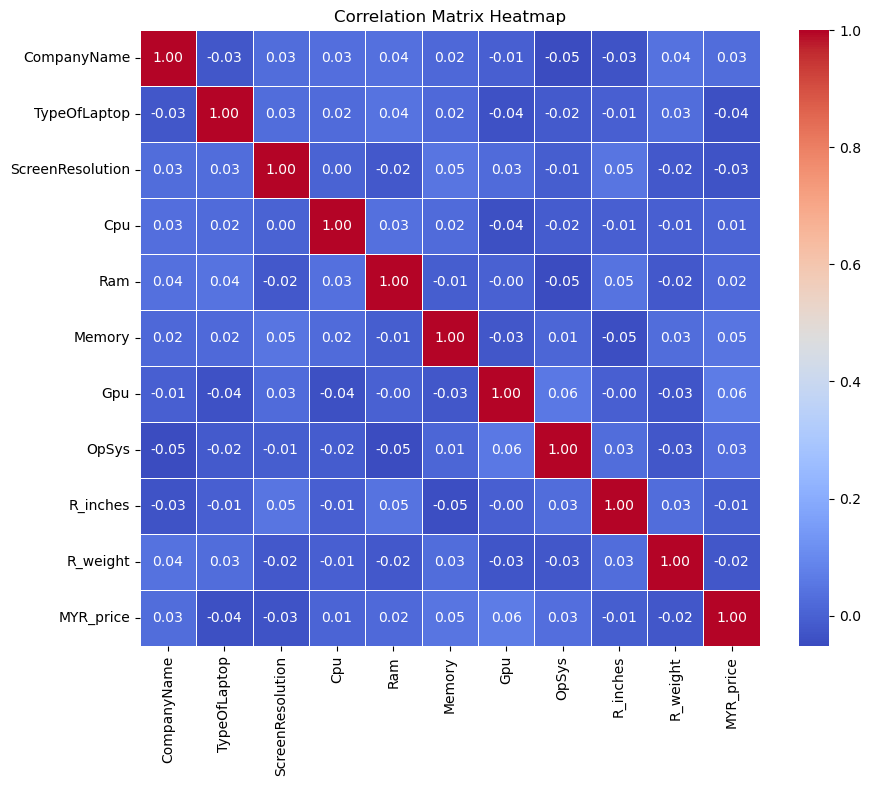

In [32]:
# Select only numeric columns
numeric_columns = df_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
top5_features

,Feature,Importance
9,R_weight,0.216186
0,CompanyName,0.151391
4,Ram,0.130732
3,Cpu,0.101251
8,R_inches,0.091889


In [34]:
new_df = df_encoded
new_df.head()

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,R_inches,R_weight,MYR_price
0,5,1,1,6,0,4,1,0,17,2.06,2043.11
1,3,0,2,5,0,4,1,1,17,4.06,2110.09
2,7,5,2,9,3,2,1,0,17,2.90,1899.77
3,5,0,0,6,1,4,1,2,12,2.91,3911.97
4,6,2,2,5,3,4,0,2,13,4.34,1929.02


In [35]:
X1 = new_df.drop('MYR_price', axis=1).values
y1 = new_df['MYR_price'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [36]:
sc = StandardScaler()
X_train_a = sc.fit_transform(X_train)
X_test_a = sc.fit_transform(X_test)

In [37]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_a, y_train)

# Make predictions using the trained Linear Regression model
linear_predictions = linear_model.predict(X_test_a)

print(y_train[0], linear_predictions[0])
# Evaluate Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Root Mean Squared Error: {math.sqrt(linear_mse)}')

linear_r2_score = r2_score(y_test, linear_predictions)
print(f'Linear Regression R2 score: {linear_r2_score}') 

2790.43 2979.2973409332467
Linear Regression Root Mean Squared Error: 811.0737628220547
Linear Regression R2 score: 0.006723172473565242


In [38]:
param_grid = {
    'copy_X': [True,False],
    'fit_intercept':[True, False],
    'n_jobs': [None,1,2],
    'positive': [True,False]
}

# base_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(linear_model, param_grid, cv=5,
                           scoring='f1_micro',n_jobs=-1)

grid_search.fit(X_train_a, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
LinearRegression(positive=True)


C:\Users\Teoh\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


In [39]:
# Train Linear Regression model
linear_model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True)
linear_model.fit(X_train_a, y_train)

# Make predictions using the trained Linear Regression model
linear_predictions = linear_model.predict(X_test_a)

print(y_train[0], linear_predictions[0])
# Evaluate Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Root Mean Squared Error: {math.sqrt(linear_mse)}')

linear_r2_score = r2_score(y_test, linear_predictions)
print(f'Linear Regression R2 score: {linear_r2_score}')

2790.43 2897.5696962808056
Linear Regression Root Mean Squared Error: 809.7935225759647
Linear Regression R2 score: 0.009856375452484967


In [40]:
# Build and train the ANN model
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(5, activation='relu'))
ann_model.add(tf.keras.layers.Dense(5, activation='relu'))
ann_model.add(tf.keras.layers.Dense(1, activation='linear'))  # Output layer for regression

ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [41]:
# training model with train dataset
history = ann_model.fit(X_train_a, y_train, batch_size=32, epochs=100, validation_data=(X_test_a,y_test))
history

Epoch 1/100

25/25 [==============================] - 1s 11ms/step - loss: 9226341.0000 - mean_squared_error: 9226341.0000 - val_loss: 9449092.0000 - val_mean_squared_error: 9449092.0000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 9225484.0000 - mean_squared_error: 9225484.0000 - val_loss: 9448244.0000 - val_mean_squared_error: 9448244.0000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 9224727.0000 - mean_squared_error: 9224727.0000 - val_loss: 9447462.0000 - val_mean_squared_error: 9447462.0000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 9223992.0000 - mean_squared_error: 9223992.0000 - val_loss: 9446641.0000 - val_mean_squared_error: 9446641.0000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 9223179.0000 - mean_squared_error: 9223179.0000 - val_loss: 9445702.0000 - val_mean_squared_error: 9445702.0000
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 

Epoch 44/100
25/25 [==============================] - 0s 4ms/step - loss: 8212151.5000 - mean_squared_error: 8212151.5000 - val_loss: 8347063.5000 - val_mean_squared_error: 8347063.5000
Epoch 45/100
25/25 [==============================] - 0s 4ms/step - loss: 8147607.0000 - mean_squared_error: 8147607.0000 - val_loss: 8277911.0000 - val_mean_squared_error: 8277911.0000
Epoch 46/100
25/25 [==============================] - 0s 4ms/step - loss: 8081043.0000 - mean_squared_error: 8081043.0000 - val_loss: 8207267.0000 - val_mean_squared_error: 8207267.0000
Epoch 47/100
25/25 [==============================] - 0s 4ms/step - loss: 8012340.0000 - mean_squared_error: 8012340.0000 - val_loss: 8135447.5000 - val_mean_squared_error: 8135447.5000
Epoch 48/100
25/25 [==============================] - 0s 4ms/step - loss: 7942541.5000 - mean_squared_error: 7942541.5000 - val_loss: 8060765.5000 - val_mean_squared_error: 8060765.5000
Epoch 49/100
25/25 [==============================] - 0s 5ms/step - lo

25/25 [==============================] - 0s 3ms/step - loss: 4441106.5000 - mean_squared_error: 4441106.5000 - val_loss: 4384390.0000 - val_mean_squared_error: 4384390.0000
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 4356518.5000 - mean_squared_error: 4356518.5000 - val_loss: 4296554.0000 - val_mean_squared_error: 4296554.0000
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 4273289.5000 - mean_squared_error: 4273289.5000 - val_loss: 4208929.5000 - val_mean_squared_error: 4208929.5000
Epoch 91/100
25/25 [==============================] - 0s 3ms/step - loss: 4190133.7500 - mean_squared_error: 4190133.7500 - val_loss: 4123591.0000 - val_mean_squared_error: 4123591.0000
Epoch 92/100
25/25 [==============================] - 0s 3ms/step - loss: 4108767.0000 - mean_squared_error: 4108767.0000 - val_loss: 4038184.7500 - val_mean_squared_error: 4038184.7500
Epoch 93/100
25/25 [==============================] - 0s 3ms/step - loss: 4027828.7

In [42]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


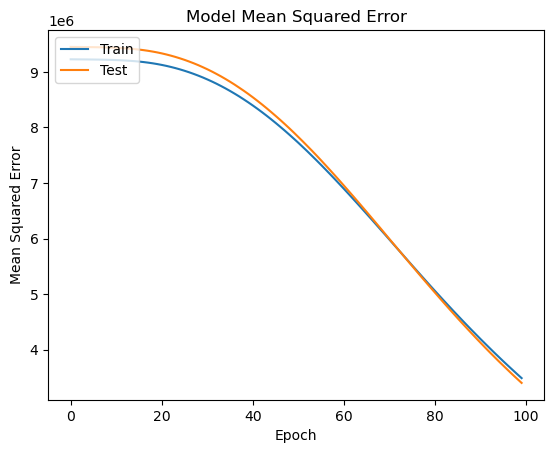

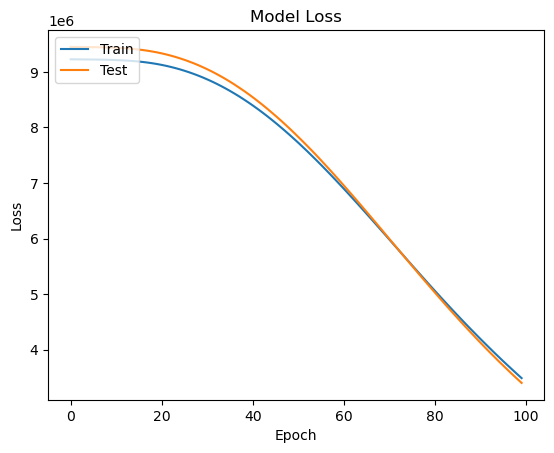

In [43]:
# plot model accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
ann_model.save('ann_model.keras')

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model = load_model('ann_model.keras')

In [47]:
predictions = model.predict(X_test)

results_df = pd.DataFrame(
    {'Predicted':y_pred.flatten(),
    'Actual':y_test.flatten()
    }
)
results_df

7/7 [==============================] - 0s 2ms/step


,Predicted,Actual
0,2826.0984,2992.65
1,3086.8839,3103.49
2,2930.1921,1968.92
3,3178.1190,2129.08
4,3196.7209,3301.25
...,...,...
195,2866.3001,2665.54
196,3412.7677,3356.27
197,2725.6899,2162.05
198,2922.0377,3283.96


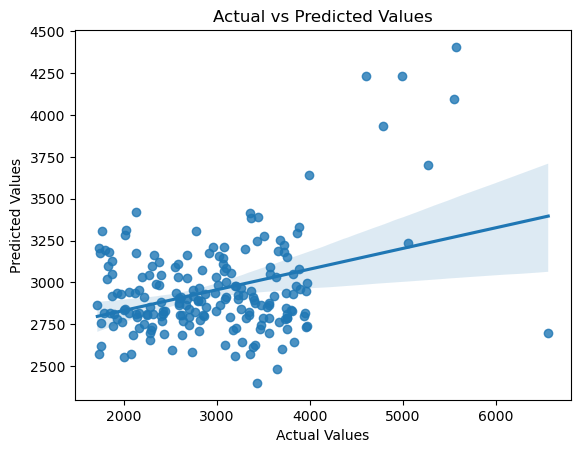

In [48]:
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()